In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Contoh dataset
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Boston', 'Miami'],
    'Temperature': [25, 30, 22, 18, 28],
    'Category': ['A', 'B', 'A', 'C', 'B']
}
df = pd.DataFrame(data)

# Contoh 1: Encoding kategori
encoder = OneHotEncoder(sparse_output=False)
encoded_category = encoder.fit_transform(df[['Category']])

# Contoh 2: Transformasi fitur numerik
scaler = StandardScaler()
scaled_temperature = scaler.fit_transform(df[['Temperature']])

# Contoh 3: Penggabungan fitur
df['City_Temperature'] = df['City'] + '_' + df['Temperature'].astype(str)

# Contoh 4: Pengurangan dimensi dengan PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(encoded_category)

# Contoh 5: Ekstraksi fitur teks dengan TF-IDF
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
    'This is the fifth document.' # Added a fifth document to match the number of samples in df['Category']
]
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(corpus).toarray()

# Gabungkan semua fitur ke dalam satu DataFrame
features = pd.DataFrame(X_text, columns=vectorizer.get_feature_names_out())
features['Temperature'] = scaled_temperature
features['PCA_Category'] = pca_result

# Memisahkan fitur dan label, dan membagi dataset
X = features
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Contoh menggunakan model machine learning setelah feature engineering
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


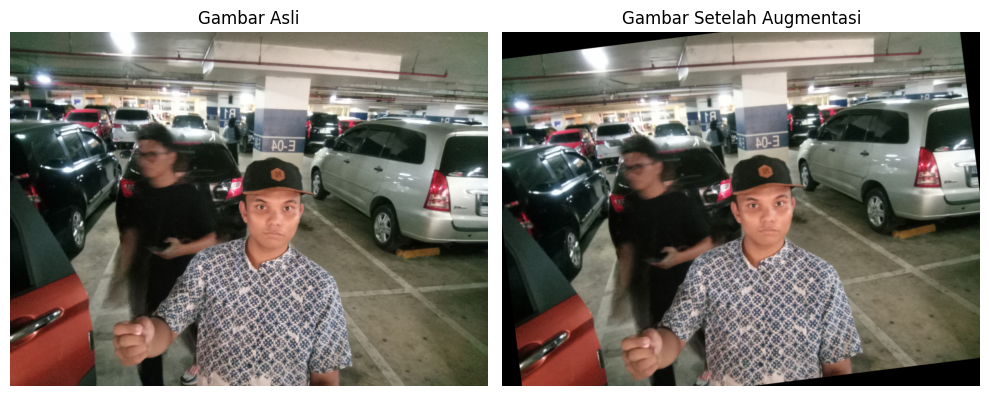

In [5]:
import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
from PIL import Image

# Contoh gambar
image = np.array(Image.open('dzaki.png'))

# Definisi augmentor
seq = iaa.Sequential([
    iaa.Fliplr(0.5),                    # Flip horizontal dengan peluang 50%
    iaa.Affine(rotate=(-10, 10)),       # Rotasi gambar dalam rentang -10 sampai 10 derajat
    iaa.GaussianBlur(sigma=(0, 1.0))    # Blur Gaussian dengan sigma antara 0 dan 1.0
])

# Augmentasi gambar
augmented_image = seq(image=image)

# Tampilkan hasil augmentasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Gambar Asli')
plt.axis('off')  # Hide the axis for a cleaner look

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Gambar Setelah Augmentasi')
plt.axis('off')  # Hide the axis for a cleaner look

plt.tight_layout()
plt.show()


In [16]:
from textblob import TextBlob
import random
import nltk

# Download the necessary resources for nltk
nltk.download('punkt')

try:
    # Contoh teks
    text = "Ini adalah contoh kalimat untuk augmentasi teks."
    
    # Objek TextBlob untuk teks
    blob = TextBlob(text)

    # Pertambahan kata
    augmented_text = list(blob.words) + ['baru', 'kata']

    # Penggantian kata acak
    for i in range(len(blob.words)):
        if random.random() < 0.3:  # Probabilitas 30% untuk penggantian kata
            augmented_text[i] = 'kata_baru'

    # Konversi kembali ke teks
    augmented_text = ' '.join(augmented_text)

    print("Teks Asli:", text)
    print("Teks Setelah Augmentasi:", augmented_text)

except LookupError as e:
    print("Error:", e)
    print("Please download the necessary NLTK data by running nltk.download('punkt')")


Teks Asli: Ini adalah contoh kalimat untuk augmentasi teks.
Teks Setelah Augmentasi: Ini kata_baru contoh kalimat kata_baru augmentasi kata_baru baru kata


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Contoh dataset
data = np.array([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])

# 1. Min-Max Scaling (Normalization)
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data)
print("Min-Max Scaled Data:")
print(data_minmax_scaled)
print()

# 2. Z-Score Normalization (Standardization)
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data)
print("Z-Score Standardized Data:")
print(data_standard_scaled)


Min-Max Scaled Data:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]

Z-Score Standardized Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prediksi menggunakan model yang sudah dilatih
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model AdaBoost
clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Prediksi menggunakan model yang sudah dilatih
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.87


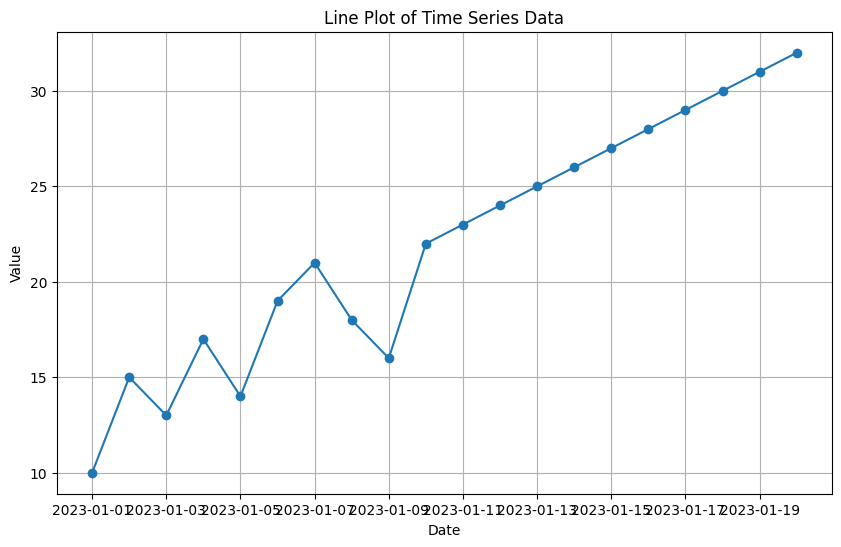

ValueError: x must have 2 complete cycles requires 24 observations. x only has 20 observation(s)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load data from CSV
data = pd.read_csv('book1.csv', parse_dates=['date'], index_col='date')

# Visualize data with line plot
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], marker='o', linestyle='-')
plt.title('Line Plot of Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Decompose time series data
result = seasonal_decompose(data['value'], model='additive', period=12) # Updated period to match monthly data

# Visualize trend component
plt.figure(figsize=(10, 6))
plt.plot(result.trend)
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.grid(True)
plt.show()

# Visualize seasonal component
plt.figure(figsize=(10, 6))
plt.plot(result.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Value')
plt.grid(True)
plt.show()

# Visualize residual component
plt.figure(figsize=(10, 6))
plt.plot(result.resid)
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.grid(True)
plt.show()


In [18]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK resources if not already available
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Ambil dataset ulasan film dari NLTK
reviews = []
for fileid in movie_reviews.fileids():
    review = movie_reviews.raw(fileid)
    reviews.append(review)

# Ambil contoh ulasan
sample_review = reviews[0]

# Tokenisasi kata-kata dalam ulasan
tokens = word_tokenize(sample_review)

# Hilangkan stop words (kata-kata umum yang tidak memiliki makna penting)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Analisis sentimen menggunakan VADER (Valence Aware Dictionary and sEntiment Reasoner)
sid = SentimentIntensityAnalyzer()
sentiment_score = sid.polarity_scores(sample_review)

# Tampilkan hasil
print("Contoh Ulasan Film:")
print(sample_review)
print("\nTokenisasi Kata-kata:")
print(tokens[:20])  # Tampilkan 20 token pertama
print("\nTokenisasi Kata-kata setelah filtering Stop Words:")
print(filtered_tokens[:20])  # Tampilkan 20 token pertama setelah filtering stop words
print("\nAnalisis Sentimen:")
print(sentiment_score)


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


Contoh Ulasan Film:
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience